## Appendix - Python Code and Outputs

### Data Preparation

First, we will set up this notebook so that it will display multiple outputs for each cell if needed.

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Second, we will import the data.  We will view the first five rows of data and the shape of the dataframe to confirm that the data imported correctly.

In [15]:
import pandas as pd
housing_training_data = pd.read_csv('train.csv')

# show first five rows of the data
housing_training_data.head()
# show number of columns and rows
housing_training_data.shape
# show column names, type, and non-null counts
housing_training_data.info(verbose = True, show_counts = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Distribution of the Dependent Variable

We can begin examining the distribution of this dataset's dependent variable, sale price, by generating summary statistics for this variable.

In [16]:
housing_training_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can also construct a histogram and a boxplot to visualize the distribution of the sale price variable in this dataframe.

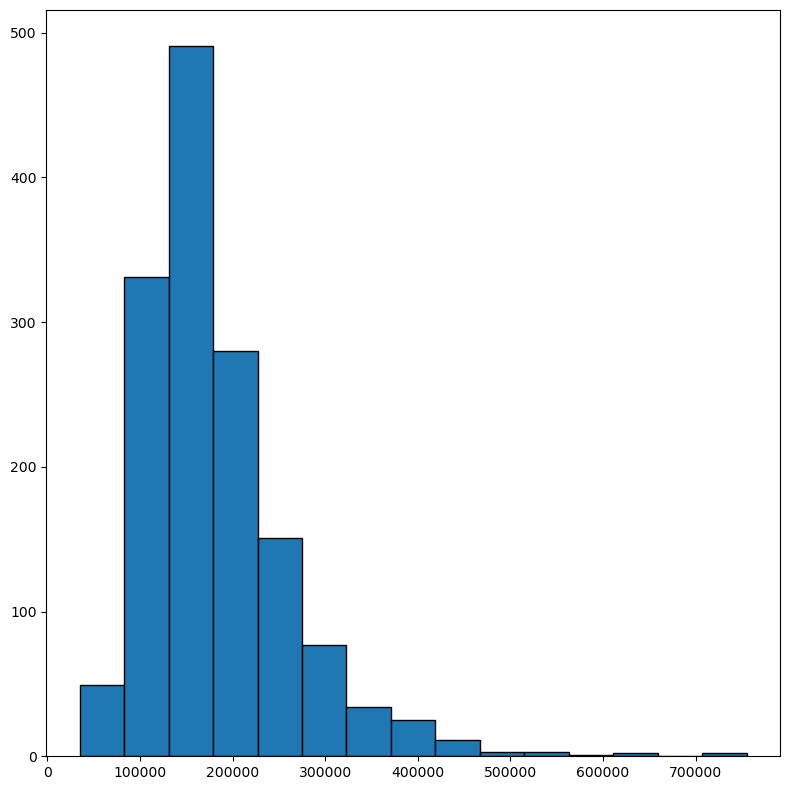

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram = housing_training_data['SalePrice'].hist(edgecolor = 'black', bins = 15, figsize = (8, 8), grid = False)

<AxesSubplot:xlabel='SalePrice'>

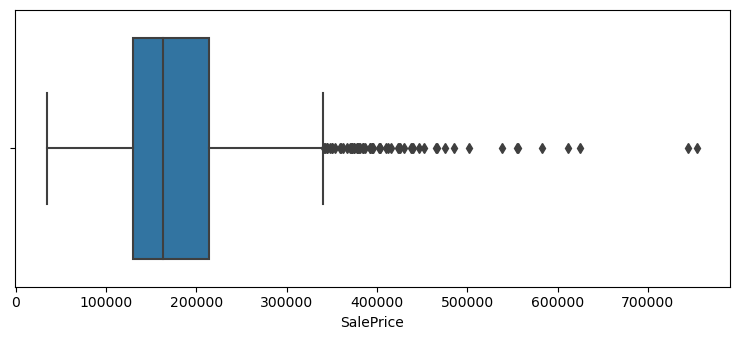

In [18]:
sns.boxplot(x=housing_training_data["SalePrice"])

homeprice kurtosis: 6.509812011089439
log of homeprice kurtosis: 0.8026555069117713


array([<AxesSubplot:title={'center':'SalePrice'}>], dtype=object)

array([<AxesSubplot:title={'center':'logSalePrice'}>], dtype=object)

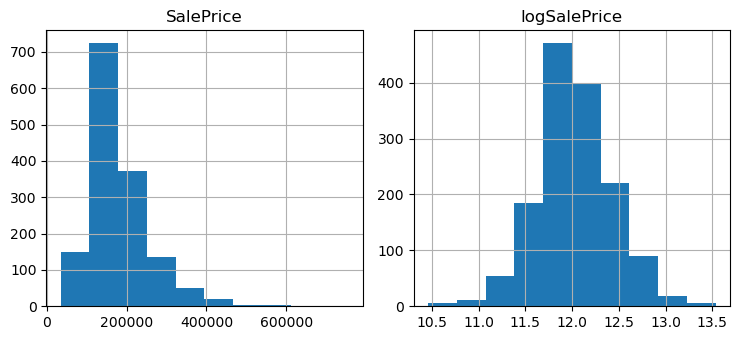

In [19]:
import numpy as np
from scipy.stats import norm, kurtosis

raw_data = housing_training_data['SalePrice']
transform_data = np.log(housing_training_data['SalePrice'])

print("homeprice kurtosis:", kurtosis(raw_data))
print("log of homeprice kurtosis:", kurtosis(transform_data))


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

s1 = pd.DataFrame(raw_data)
s2 = pd.DataFrame(np.array(transform_data).tolist(), columns = ['logSalePrice'])

fig, axes = plt.subplots(1, 2)

s1.hist('SalePrice', ax=axes[0])
s2.hist('logSalePrice', ax=axes[1])

plt.show()

## Shapiro Wilk test for normality

In [20]:
from scipy import stats

print("Shapiro Wilk test for normality: ", stats.shapiro(raw_data))
print("Shapiro Wilk test for normality: ", stats.shapiro(transform_data))


Shapiro Wilk test for normality:  ShapiroResult(statistic=0.869672954082489, pvalue=3.2072044604461286e-33)
Shapiro Wilk test for normality:  ShapiroResult(statistic=0.9912080764770508, pvalue=1.1514231346154702e-07)


The Shapiro Wilk test for normality (H0: normal, Ha: not-normal) suggests a departure from normality for both the raw and transformed data.

### Investigation of Missing Data and Outliers

We can take a look at the counts of reported values in each column to determine the number of missing values for each variable in the dataframe.

In [21]:
# find null counts, percentage of null values, and column type
null_count = housing_training_data.isnull().sum()
null_percentage = housing_training_data.isnull().sum() * 100 / len(housing_training_data)
column_type = housing_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object


We will deal with columns that contain missing values. For the purpose of this exploratory data analysis, we will use the percentage of nulls missing, the column type, and the other columns present in the data that may provide information that can be used to fill in the missing values.

We will remove columns with over 50% Null values.

In [22]:
# PoolQC, MiscFeature, Alley, Fence all have over 50% of missing values, we will remove those from our dataframe
housing_training_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# show new shape
housing_training_data.shape

(1460, 77)

We will set Null values in columns that are non-numeric to None.

In [23]:
# select non-numeric columns that contain more than 1 Null value
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond','MasVnrType','Electrical']
# set Nulls in non-numeric columns to 'None'
housing_training_data[columns_None] = housing_training_data[columns_None].fillna('None')

We determine the best way to handle nulls for each numeric column. We replace nulls in Masonry veneer area with 0, nulls in Lot Frontage with the median, and nulls in Year Garage was built with the average between the year the garage was built and year house was built .

In [24]:
# change Null values to 0 for Masonry veneer area
housing_training_data['MasVnrArea'].fillna(0, inplace=True)

# show distribution stats for Lot Frontage
housing_training_data['LotFrontage'].describe()
# fill Nulls for Lot Frontage with median value
housing_training_data['LotFrontage'].fillna(housing_training_data['LotFrontage'].median(), inplace=True)

# average years between garage being built and years built
avg_years = round((housing_training_data['GarageYrBlt'] - housing_training_data['YearBuilt']).mean())
# fill Nulls with avg bet year garage was built and year house was built 
housing_training_data['GarageYrBlt'].fillna(housing_training_data['YearBuilt']+avg_years, inplace=True)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see there are no more missing values in our original dataframe.

In [25]:
# check that there are no more missing values in the dataframe
null_count = housing_training_data.isnull().sum()
null_count[null_count != 0]

Series([], dtype: int64)

We can also create boxplots for each of the continuous variables in the dataframe to analyze whether outliers exist for each of those variables.

<AxesSubplot:xlabel='LotFrontage'>

<AxesSubplot:xlabel='LotArea'>

<AxesSubplot:xlabel='OverallQual'>

<AxesSubplot:xlabel='OverallCond'>

<AxesSubplot:xlabel='YearBuilt'>

<AxesSubplot:xlabel='YearRemodAdd'>

<AxesSubplot:xlabel='MasVnrArea'>

<AxesSubplot:xlabel='BsmtFinSF1'>

<AxesSubplot:xlabel='BsmtFinSF2'>

<AxesSubplot:xlabel='BsmtUnfSF'>

<AxesSubplot:xlabel='TotalBsmtSF'>

<AxesSubplot:xlabel='1stFlrSF'>

<AxesSubplot:xlabel='2ndFlrSF'>

<AxesSubplot:xlabel='LowQualFinSF'>

<AxesSubplot:xlabel='GrLivArea'>

<AxesSubplot:xlabel='BsmtFullBath'>

<AxesSubplot:xlabel='BsmtHalfBath'>

<AxesSubplot:xlabel='FullBath'>

<AxesSubplot:xlabel='HalfBath'>

<AxesSubplot:xlabel='BedroomAbvGr'>

<AxesSubplot:xlabel='KitchenAbvGr'>

<AxesSubplot:xlabel='TotRmsAbvGrd'>

<AxesSubplot:xlabel='Fireplaces'>

<AxesSubplot:xlabel='GarageYrBlt'>

<AxesSubplot:xlabel='GarageCars'>

<AxesSubplot:xlabel='GarageArea'>

<AxesSubplot:xlabel='WoodDeckSF'>

<AxesSubplot:xlabel='OpenPorchSF'>

<AxesSubplot:xlabel='EnclosedPorch'>

<AxesSubplot:xlabel='3SsnPorch'>

<AxesSubplot:xlabel='ScreenPorch'>

<AxesSubplot:xlabel='PoolArea'>

<AxesSubplot:xlabel='MiscVal'>

<AxesSubplot:xlabel='SalePrice'>

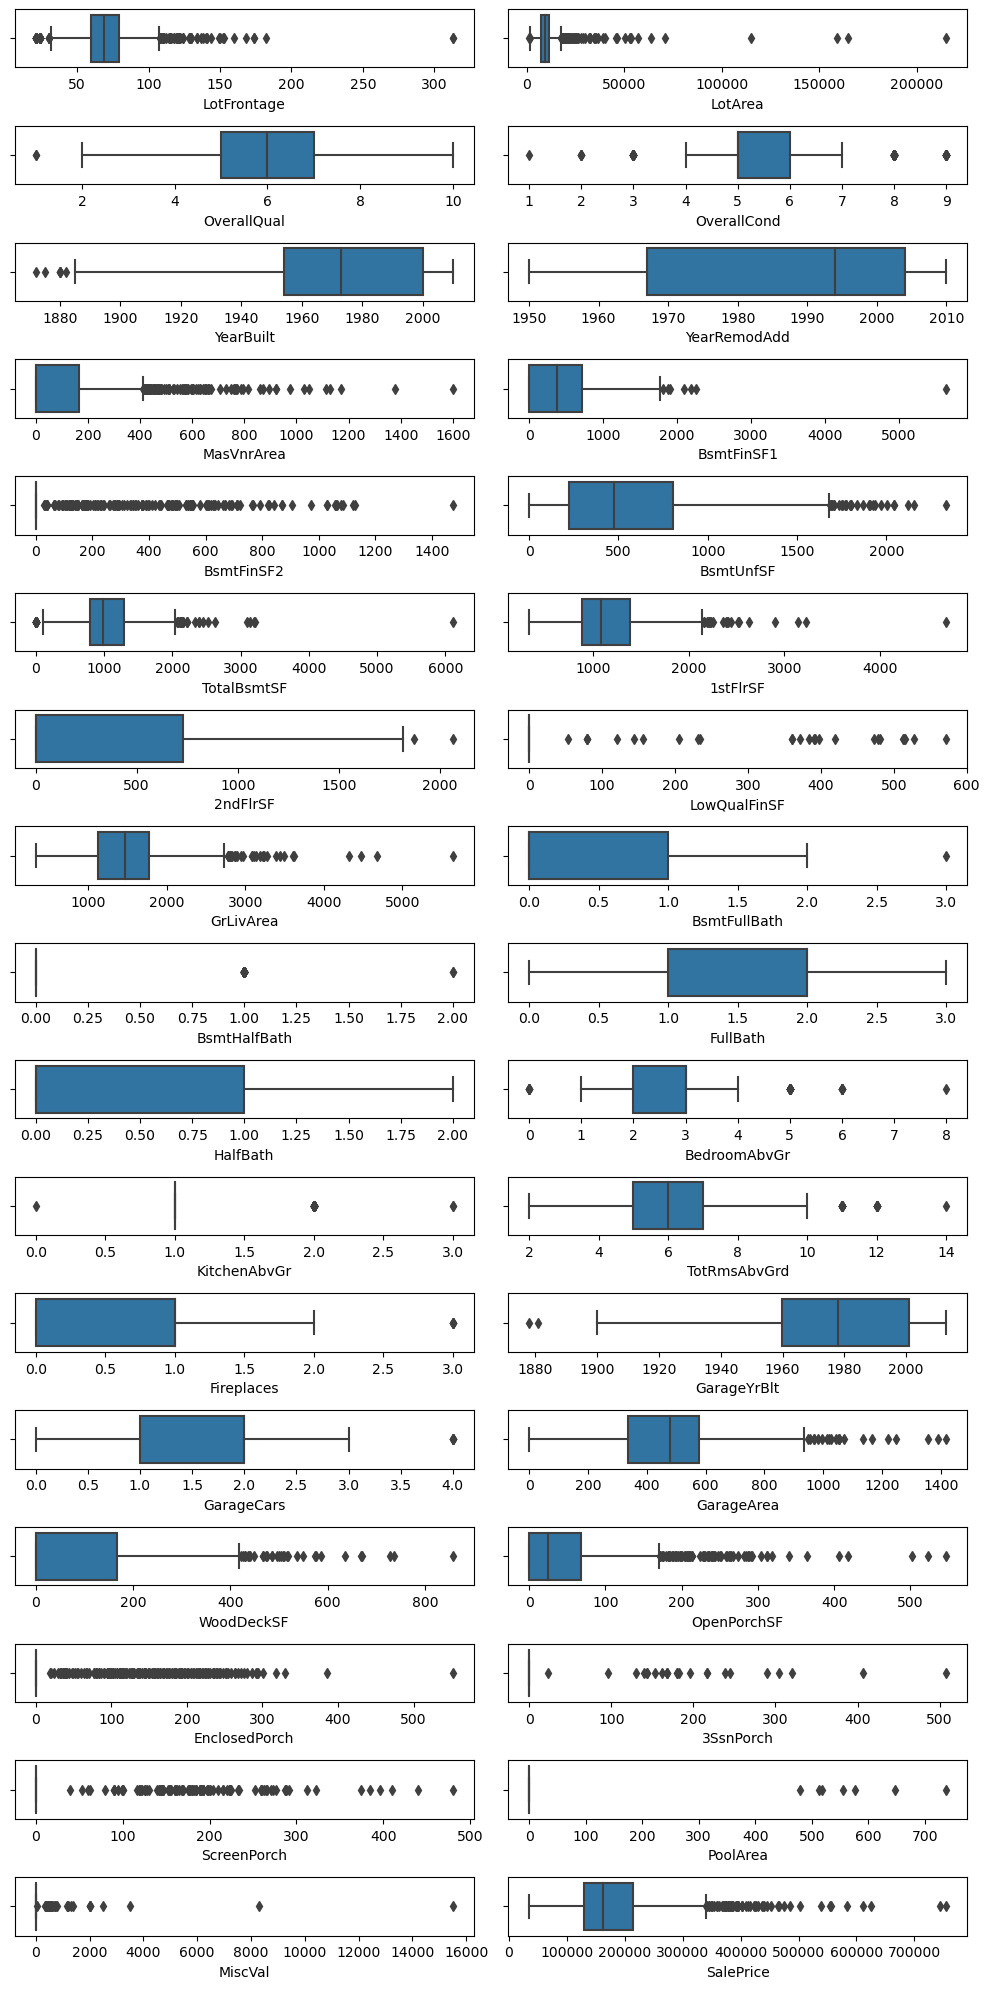

In [26]:
numerical_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

fig, ax = plt.subplots(17, 2, figsize = (10, 20))

for var, subplot in zip(numerical_vars, ax.flatten()):
    sns.boxplot(x=housing_training_data[var], ax = subplot)
    
fig.tight_layout()

### 3.4) Examination of the Relationship between the Dependent Variable and Potential Predictors

We can use a correlation heatmap to quantify the correlation between the dependent variable, sale price, and the potential continuous predictor variables.

<AxesSubplot:>

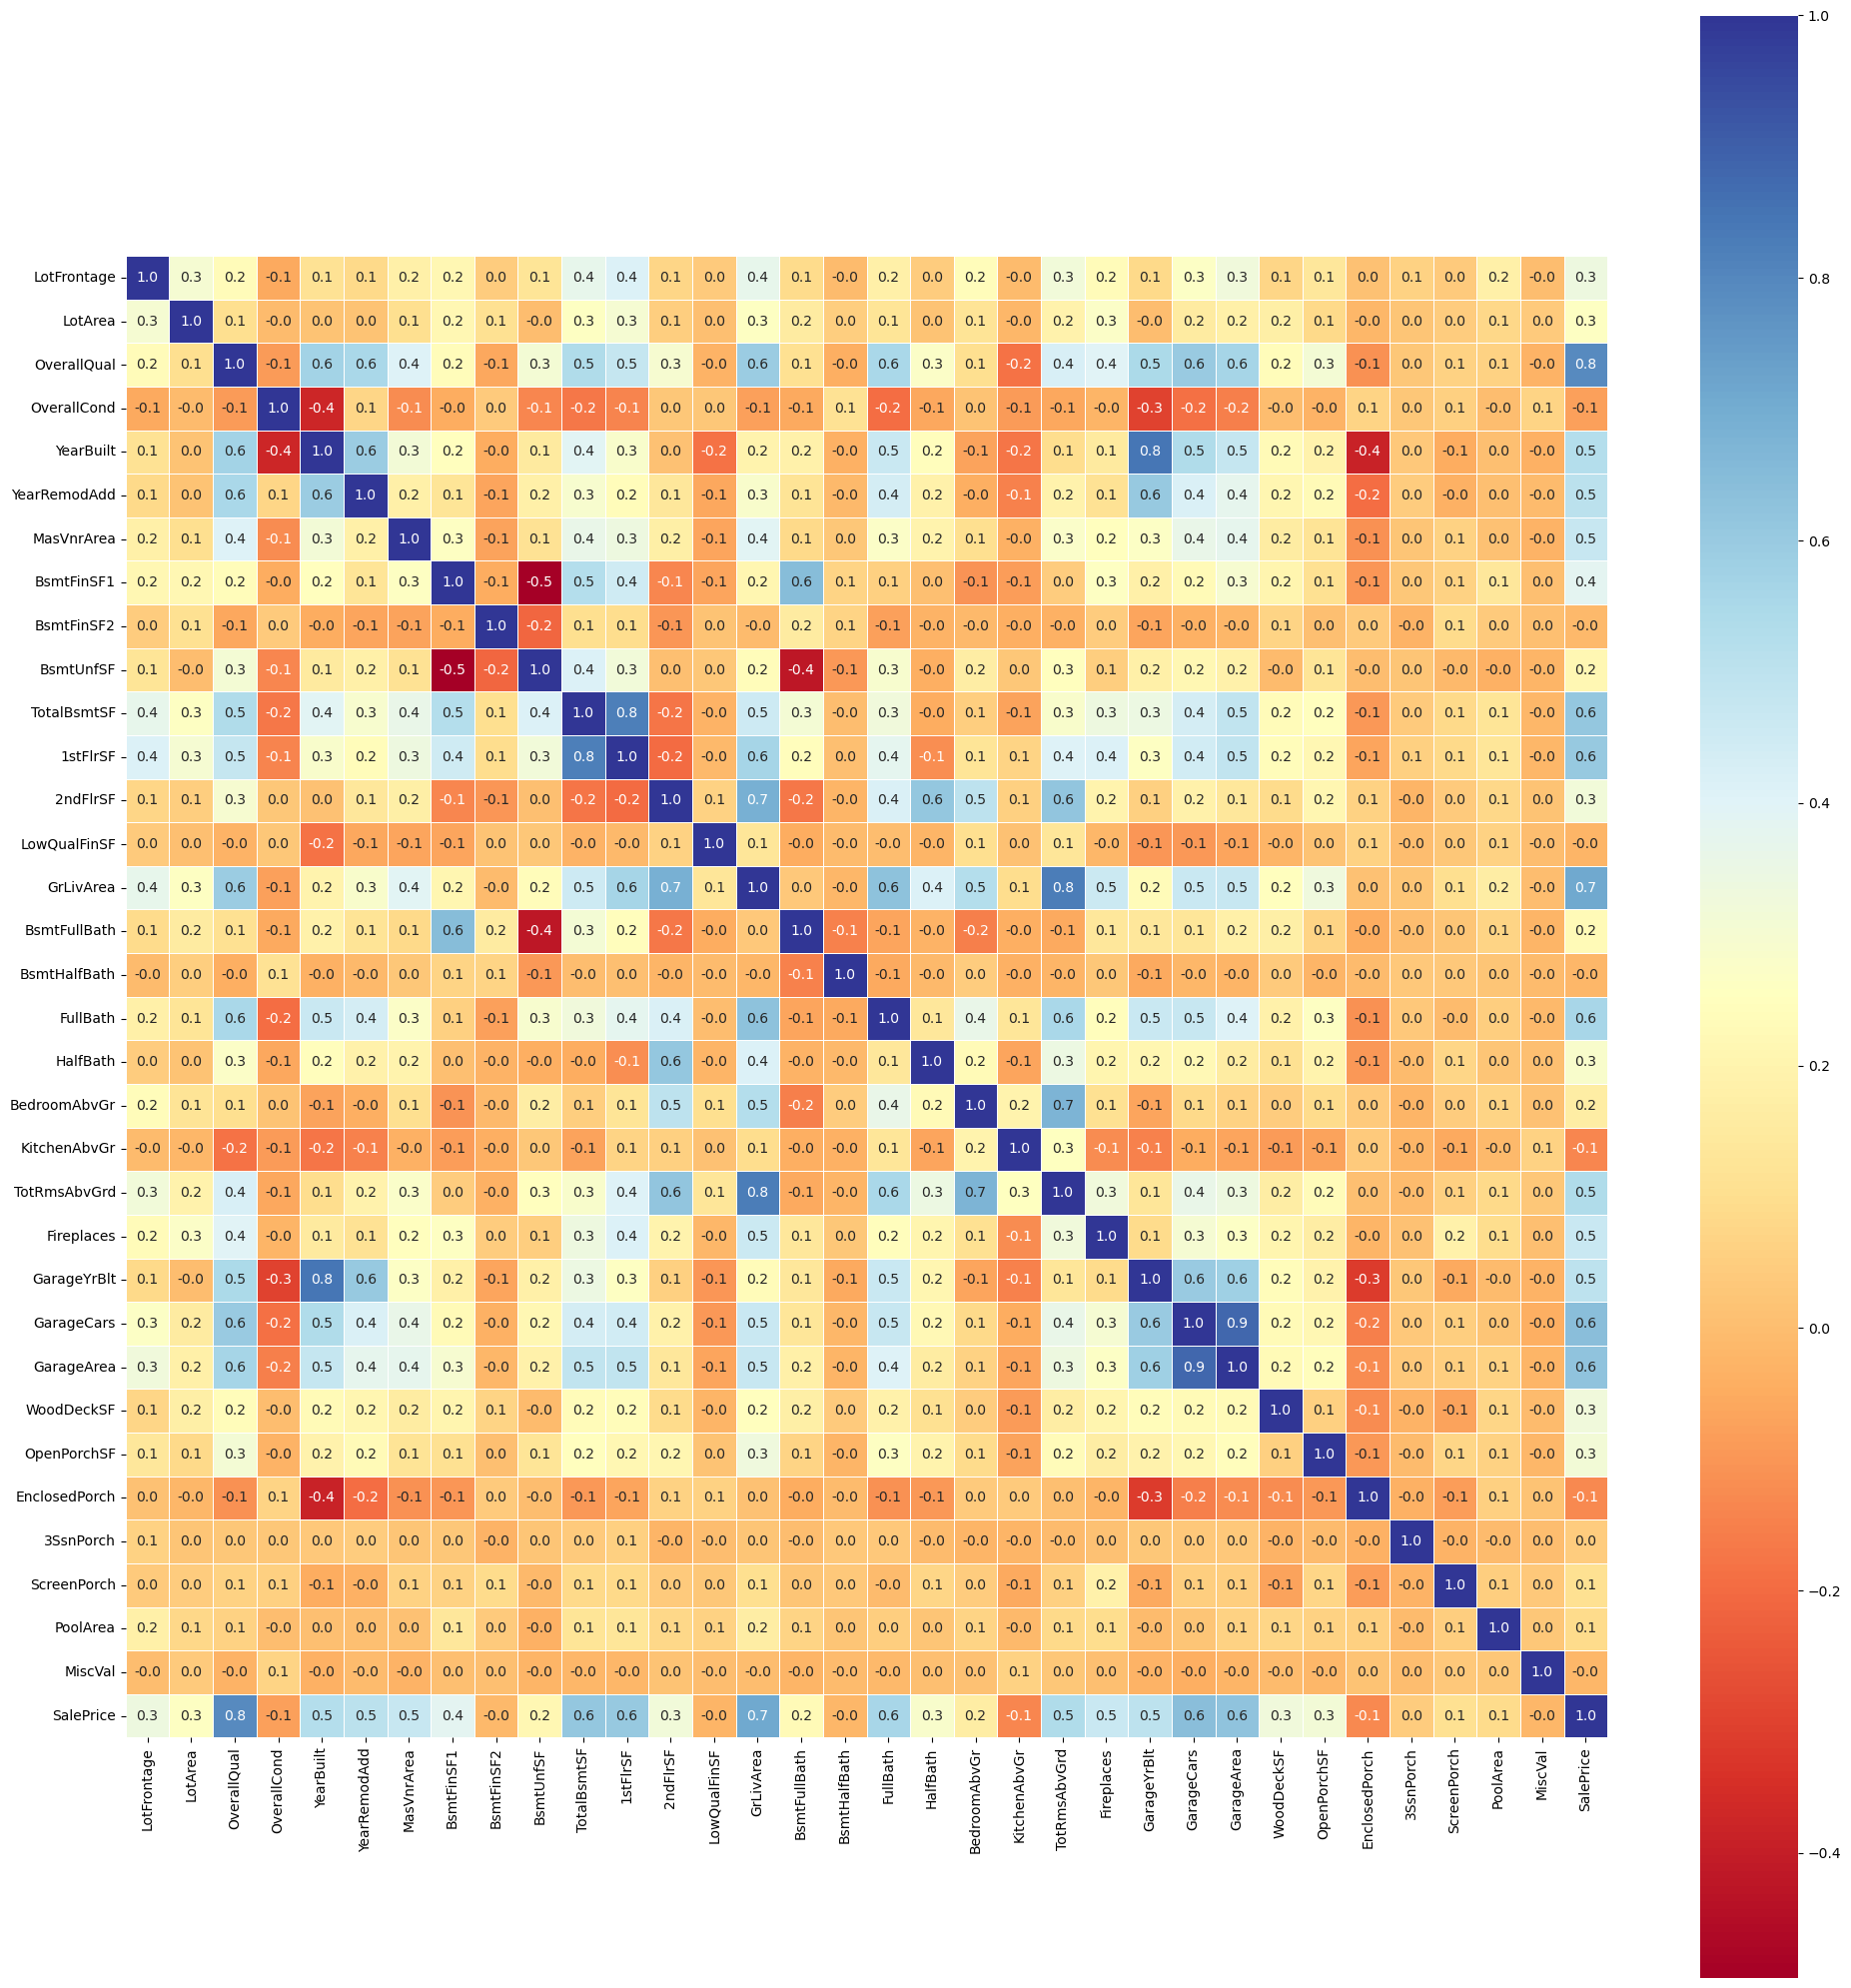

In [27]:
df_corr_housing_training = housing_training_data[numerical_vars]
corrmat_housing_training = df_corr_housing_training.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat_housing_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

In [28]:
#Correlation with output variable
cor_target = abs(corrmat_housing_training["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.503288
Name: SalePrice, dtype: float64

We can use jointplots to take a closer look at the relationship between sale price and five of the continuous variables with which sale price has a strong or moderate association: OverallQual, GrLivArea, GarageArea, Fullbath, and TotalBsmntSF.

Below are plots that examine the relationship between variables of interest and sale price

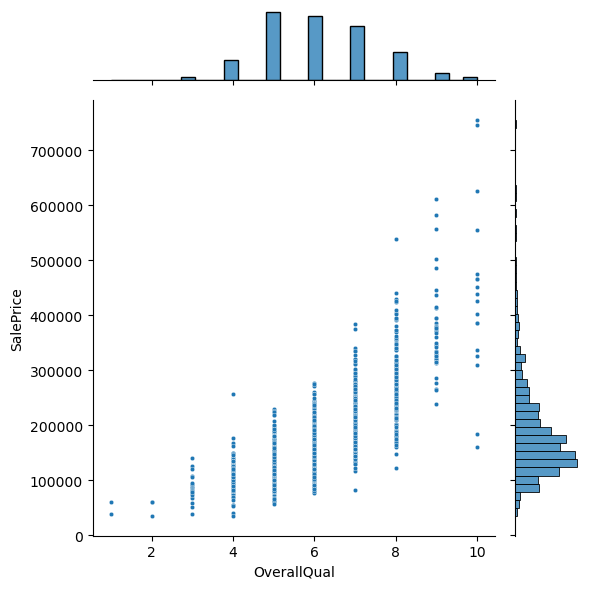

In [29]:
sns.jointplot(x='OverallQual', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

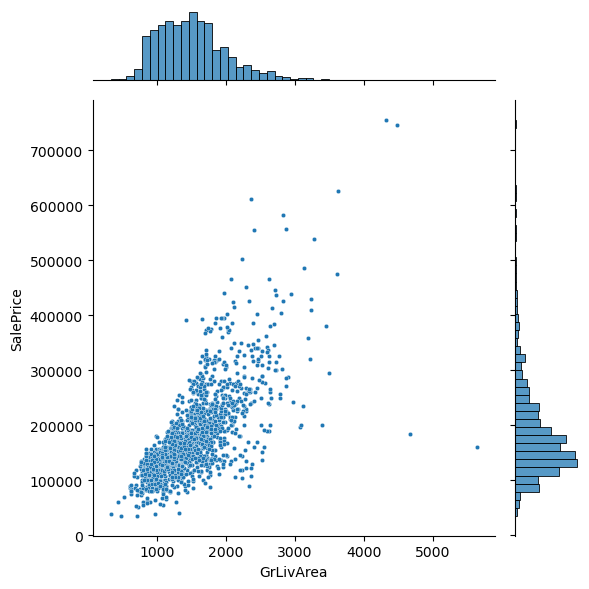

In [30]:
sns.jointplot(x='GrLivArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

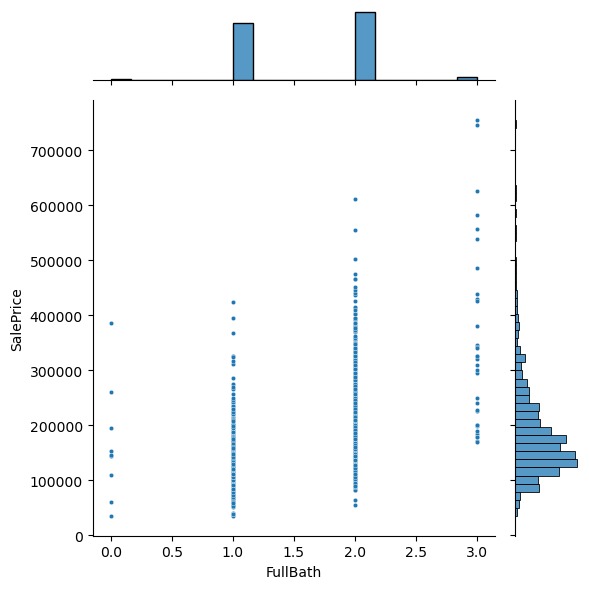

In [31]:
sns.jointplot(x='FullBath', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

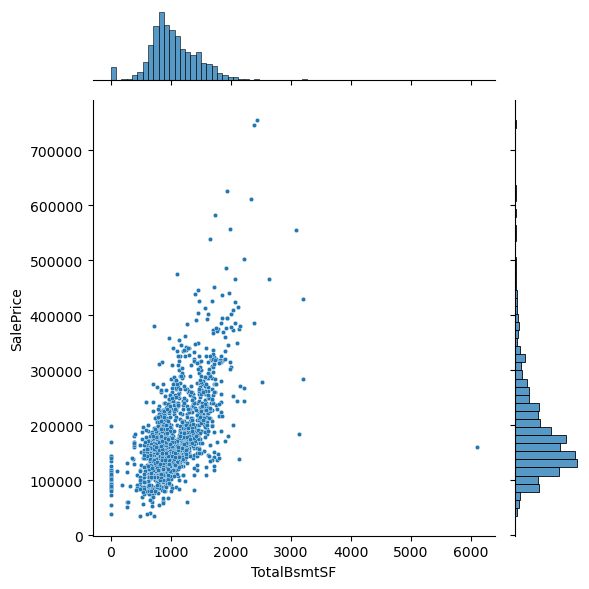

In [32]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

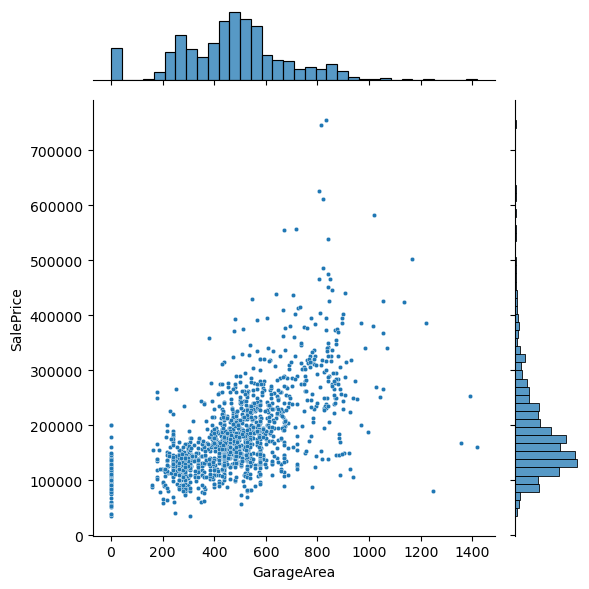

In [33]:
sns.jointplot(x='GarageArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

To determine which binary categorical variables might serve as the best predictors in a regression model, we can create boxplots and run t-tests to help decipher which binary indicator variables may have the strongest relationship with home sale prices.

In [34]:
categorical_variables = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',  'RoofMatl',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                        'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                        'GarageQual', 'GarageCond', 'PavedDrive',  'SaleType', 'SaleCondition']

category_counts = []

for var in categorical_variables:
    category_counts.append(len(housing_training_data[var].unique()))
    


categorical_variable_dictionary = {'Categorical Predictor':categorical_variables,'Number of Categories':category_counts}
categorical_var_df = pd.DataFrame(categorical_variable_dictionary)
categorical_var_df


# Identify the Indicator Variables
indicator_variables_df = categorical_var_df[categorical_var_df['Number of Categories'] == 2] 
indicator_variables_df

# Identify the Non-Indicator Categorical Variables
non_indicator_categorial_vars_df = categorical_var_df[categorical_var_df['Number of Categories'] > 2] 
non_indicator_categorial_vars_df



,Categorical Predictor,Number of Categories
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8


,Categorical Predictor,Number of Categories
1,Street,2
4,Utilities,2
27,CentralAir,2


,Categorical Predictor,Number of Categories
0,MSZoning,5
2,LotShape,4
3,LandContour,4
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,8
10,BldgType,5
11,HouseStyle,8


<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

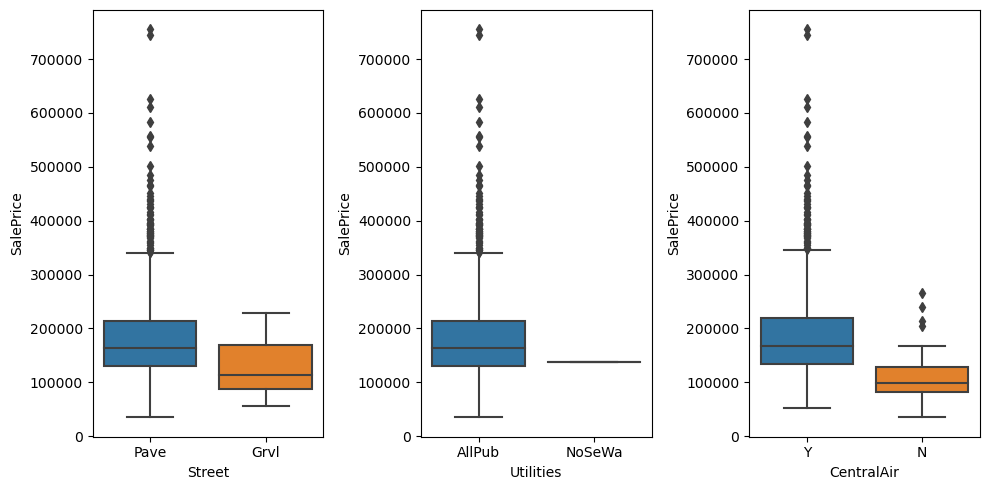

In [35]:
indicator_vars = ['Street', 'Utilities', 'CentralAir']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

for var, subplot in zip(indicator_vars, ax.flatten()):
         sns.boxplot(x = var, y = 'SalePrice', data=housing_training_data, ax=subplot)

fig.tight_layout()

In [36]:
# Run T-Tests To Determine Which Indicator Variables Might Have the Strongest Associations with Sale Price
from scipy.stats import ttest_ind

Street_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['Street'] == 'Pave'],
          housing_training_data['SalePrice'][housing_training_data['Street'] == 'Grvl'],
          equal_var=False)

Utilities_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['Utilities'] == 'AllPub'],
          housing_training_data['SalePrice'][housing_training_data['Utilities'] == 'NoSeWa'],
          equal_var=False)

Central_Air_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['CentralAir'] == 'Y'],
          housing_training_data['SalePrice'][housing_training_data['CentralAir'] == 'N'],
          equal_var=False)



Indicator_Variable_t_test_statistics = [Street_t_test[0], Utilities_t_test[0], Central_Air_t_test[0]]

Indicator_Variable_t_test_p_values = [Street_t_test[1], Utilities_t_test[1], Central_Air_t_test[1]]

indicator_var_t_tests = {'Indicator Variable':indicator_vars,'T-Test Statistic':Indicator_Variable_t_test_statistics, 
                        'P-Values':Indicator_Variable_t_test_p_values}
Indicator_var_t_test_df = pd.DataFrame(indicator_var_t_tests)
Indicator_var_t_test_df.style.background_gradient(cmap = 'Greens')


C:\Users\mhurt\AppData\Local\Temp\ipykernel_18068\3879363142.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Utilities_t_test = ttest_ind(housing_training_data['SalePrice'][housing_training_data['Utilities'] == 'AllPub'],
C:\Users\mhurt\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\mhurt\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Indicator Variable,T-Test Statistic,P-Values
0,Street,1.900788,0.115048
1,Utilities,nan,nan
2,CentralAir,17.267773,0.000000


To determine which categorical variables might be most useful for inclusion in a regression model (in the form of a dichotomous variable), we can create boxplots and run analyses of variance (ANOVA) to determine which non-binary categorical variables may have the strongest relationship with home sale prices.

We can create boxplots to visually display the distribution of sale prices disaggregated by the categories associated with each of the non-indicator categorical variables as well.

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

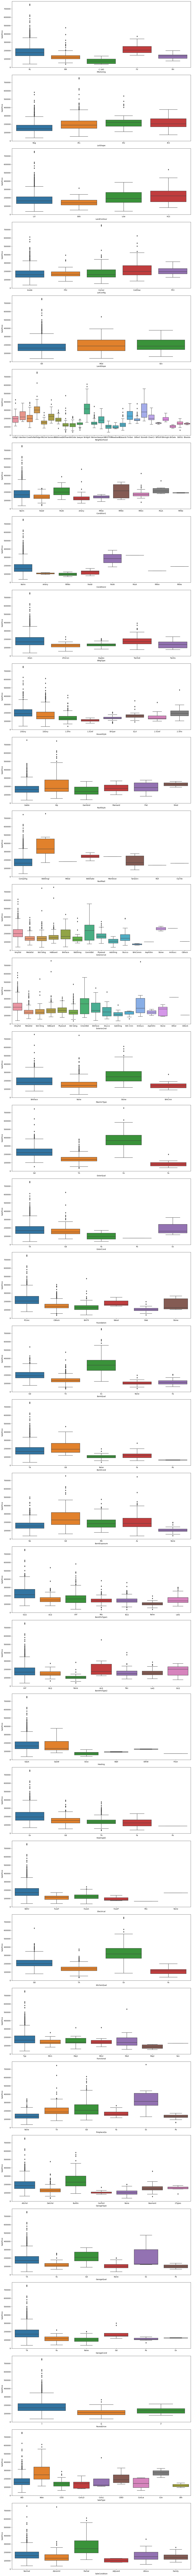

In [37]:

fig, ax = plt.subplots(35, 1, figsize=(15, 200))

for var, subplot in zip(non_indicator_categorial_vars_df['Categorical Predictor'], ax.flatten()):
         sns.boxplot(x = var, y = 'SalePrice', data=housing_training_data, ax=subplot)

fig.tight_layout()

Visual inspection of the boxplots above suggests that the variables for exterior quality, basement quality, fireplace quality, and kitchen quality may provide the most promise in our search for helpful categorical predictors that may be transformed into dichotomous variables.  Conducting ANOVAs can shed more light on the relationship between these four variables and home sale prices.

In [38]:
ANOVA_variables = ['ExterQual', 'BsmtQual', 'FireplaceQu', 'KitchenQual']

from scipy.stats import f_oneway

# ExterQual ANOVA
ExterQual_Gd = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Gd']
ExterQual_TA = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'TA']
ExterQual_Ex = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Ex']
ExterQual_Fa = housing_training_data['SalePrice'][housing_training_data['ExterQual'] == 'Fa']

ANOVA_ExterQual = f_oneway(ExterQual_Gd, ExterQual_TA, ExterQual_Ex, ExterQual_Fa)

# BsmtQual ANOVA
BsmtQual_Gd = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Gd']
BsmtQual_TA = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'TA']
BsmtQual_Ex = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Ex']
BsmtQual_None = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'None']
BsmtQual_Fa = housing_training_data['SalePrice'][housing_training_data['BsmtQual'] == 'Fa']

ANOVA_BsmtQual = f_oneway(BsmtQual_Gd, BsmtQual_TA, BsmtQual_Ex, BsmtQual_None, BsmtQual_Fa)
                   
# FireplaceQu ANOVA
FireplaceQu_None = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'None']
FireplaceQu_TA = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'TA']
FireplaceQu_Gd = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Gd']
FireplaceQu_Fa = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Fa']
FireplaceQu_Ex = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Ex']
FireplaceQu_Po = housing_training_data['SalePrice'][housing_training_data['FireplaceQu'] == 'Po']

ANOVA_FireplaceQu = f_oneway(FireplaceQu_None, FireplaceQu_TA, FireplaceQu_Gd, FireplaceQu_Fa,
                            FireplaceQu_Ex, FireplaceQu_Po)

# KitchenQual ANOVA
KitchenQual_Gd = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Gd']
KitchenQual_TA = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'TA']
KitchenQual_Ex = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Ex']
KitchenQual_Fa = housing_training_data['SalePrice'][housing_training_data['KitchenQual'] == 'Fa']

ANOVA_KitchenQual = f_oneway(KitchenQual_Gd, KitchenQual_TA, KitchenQual_Ex, KitchenQual_Fa)

# Compile Outputs

ANOVA_statistics = [ANOVA_ExterQual[0], ANOVA_BsmtQual[0], ANOVA_FireplaceQu[0], ANOVA_KitchenQual[0]]

ANOVA_p_values = [ANOVA_ExterQual[1], ANOVA_BsmtQual[1], ANOVA_FireplaceQu[1], ANOVA_KitchenQual[1]]

ANOVA_outputs = {'Categorical Variable': ANOVA_variables ,'Test Statistic': ANOVA_statistics, 
                 'P-Values': ANOVA_p_values}
ANOVA_df = pd.DataFrame(ANOVA_outputs)
ANOVA_df.style.background_gradient(cmap = 'Greens')





,Categorical Variable,Test Statistic,P-Values
0,ExterQual,443.334831,0.000000
1,BsmtQual,316.148635,0.000000
2,FireplaceQu,121.075121,0.000000
3,KitchenQual,407.806352,0.000000


Based on the analysis above, the variable for exterior quality seems to provide the most promise for the creation of a dichotomous variable for a regression model.  We will use the Tukey-Cramer Multiple Comparison Test to confirm whether there are statistically significant differences in means when considering pairwise comparisons of categorical variable values.

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_cramer_result = pairwise_tukeyhsd(endog=housing_training_data['SalePrice'], 
                                        groups=housing_training_data['ExterQual'],
                                        alpha=0.05)
print(tukey_cramer_result)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
    Ex     Fa -279375.7473    0.0 -323896.9633 -234854.5313   True
    Ex     Gd -135727.4513    0.0 -157297.2472 -114157.6553   True
    Ex     TA -223019.6481    0.0  -244104.848 -201934.4481   True
    Fa     Gd   143648.296    0.0  103567.2848  183729.3071   True
    Fa     TA   56356.0992 0.0016   16533.7811   96178.4172   True
    Gd     TA  -87292.1968    0.0  -95594.8733  -78989.5203   True
------------------------------------------------------------------


In [40]:
housing_training_data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

### Feature Creation

New features may enable us to create more accurate prediction models for home sale prices.  Accordingly, we will create a feature to reflect the number of years since a home has been remodeled.

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: YrSinceRemod, dtype: float64

<AxesSubplot:xlabel='YrSinceRemod', ylabel='Count'>

Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:


PearsonRResult(statistic=-0.5090787380156292, pvalue=4.3748554463765646e-97)

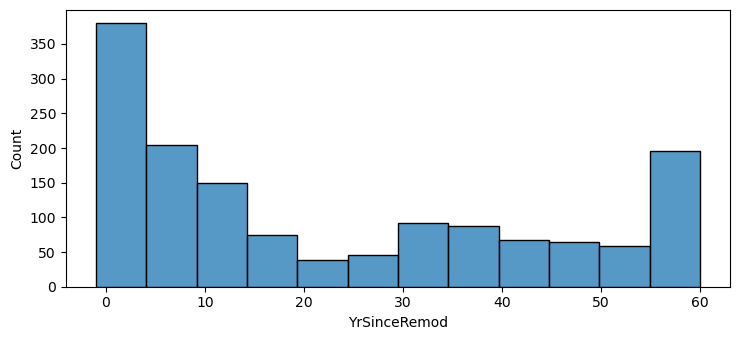

In [41]:
# create new variable, years since the house has been remodeled from selling date (use construction date if no remodeling or additions)
housing_training_data['YrSinceRemod'] = housing_training_data['YrSold'] - housing_training_data['YearRemodAdd']
housing_training_data['YrSinceRemod'].describe()
sns.histplot(data=housing_training_data, x="YrSinceRemod")

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res6 = stats.pearsonr(housing_training_data.YrSinceRemod, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:")
res6

We will also create a feature to reflect the number of total square feet in a home.

count     1460.000000
mean      2572.893151
std        823.598492
min        334.000000
25%       2014.000000
50%       2479.000000
75%       3008.500000
max      11752.000000
Name: TotalSF, dtype: float64

<AxesSubplot:xlabel='TotalSF', ylabel='Count'>

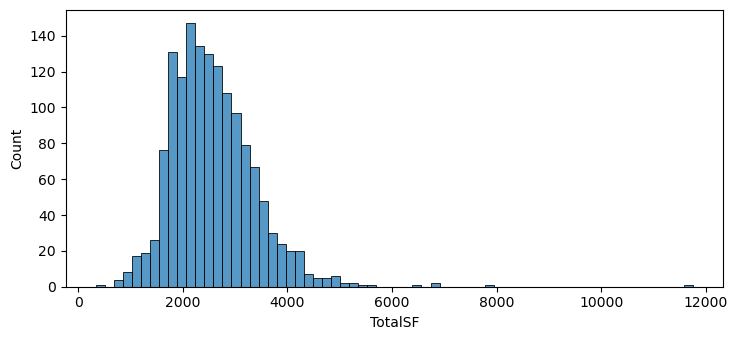

In [42]:
# create new variable TotalSF
housing_training_data['TotalSF'] = housing_training_data['TotalBsmtSF'] + housing_training_data['GrLivArea']
housing_training_data['TotalSF'].describe()
# visualize distribution
sns.histplot(data=housing_training_data, x="TotalSF")

<AxesSubplot:xlabel='TotalSF', ylabel='Count'>

Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):


PearsonRResult(statistic=0.81999629129728, pvalue=0.0)

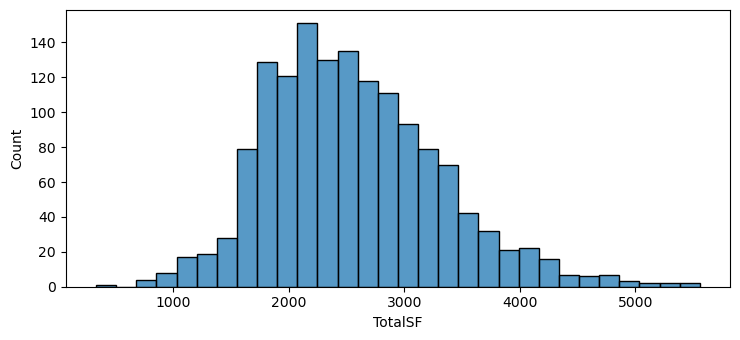

In [43]:
# drop large outlier from the dataframe
housing_training_data.drop(housing_training_data[housing_training_data['TotalSF'] > 6000].index, inplace=True)
# visualize distribution without extreme outliers
sns.histplot(data=housing_training_data, x="TotalSF")

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res7 = stats.pearsonr(housing_training_data.TotalSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):")
res7

### Model Assumptions

1. Linearity 
2. Homoscedasticity
3. Independence of Errors
4. Multivariate Normality
5. No or little Multicollinearity

### Constructing Models to Predict Home Prices

Below are simple and multiple regressions that examine the associations between variables of interest and sale price.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:30:24   Log-Likelihood:                -17613.
No. Observations:                1455   AIC:                         3.523e+04
Df Residuals:                    1453   BIC:                         3.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.239e+04   4054.647     -7.989      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

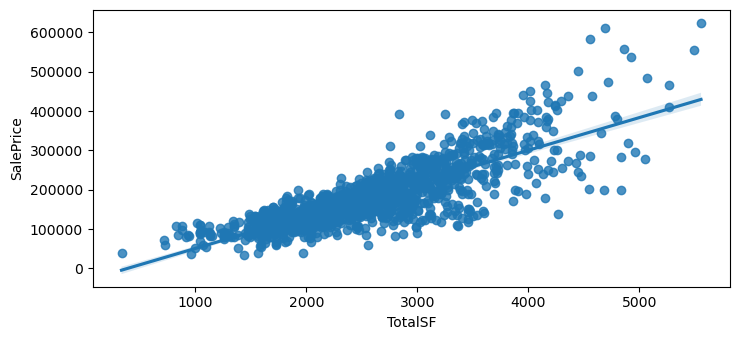

In [44]:
import numpy as np
import statsmodels.api as sm
# New feature is highly correlated, lets try a simple linear regression
x = housing_training_data['TotalSF']
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

The relationship between Sale Price and TotalSF appears to be somewhat linear. This meets the Linearity assumption.

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

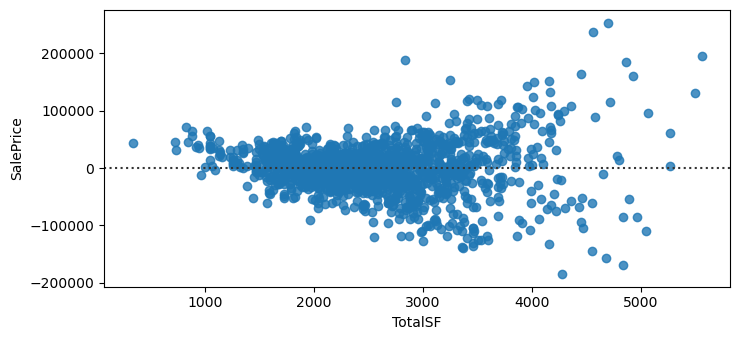

In [45]:
# plot the residuals
sns.residplot(x=x, y=y)

The residual plot shows evidence of Heteroscedasticity since as TotalSF increases, the variance also increases. This is apparent by the funnel shape the residuals in the model form. This violates the Homoscedasticity assumption and the Independence of Errors assumption.

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 625000], dtype=int64)),
 (72310.97915165413, 179979.51615120278, 0.9443870104195428))

Text(0.5, 1.0, 'Normal QQ Plot')

Text(0.5, 0, 'Theoretical Quantiles')

Text(0, 0.5, 'Sample Quantiles')

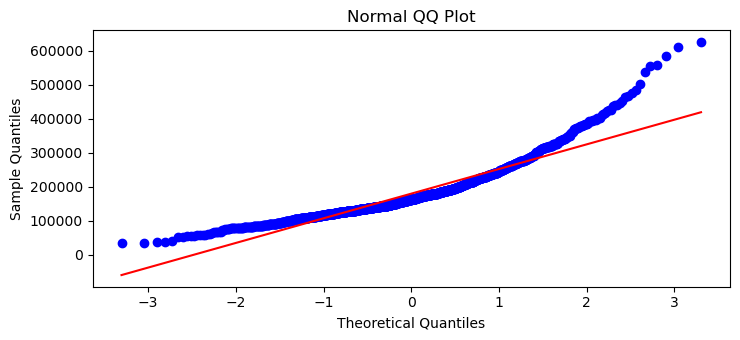

In [46]:
# qqplot
import matplotlib.pyplot as plt
stats.probplot(y, dist="norm", plot=plt)
plt.title("Normal QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The tails of the distribution deviate from the qqline indicating that the errors are not Normally distributed. This violates the Multivariate Normality assumption.

Let's try transforming the independent variable, Sales Price since we saw earlier in this analysis that this helped to Normalize its distribution.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2934.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:30:24   Log-Likelihood:                 89.766
No. Observations:                1455   AIC:                            -175.5
Df Residuals:                    1453   BIC:                            -165.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9256      0.021    518.068      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

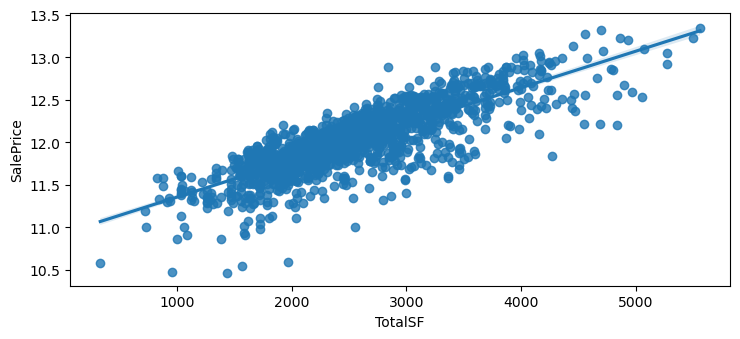

In [47]:
# log transform Sales Price variable
y_log = np.log(housing_training_data['SalePrice'])

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_log, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y_log)


The relationship between log(Sale Price) and TotalSF appears to be linear. This meets the Linearity assumption.

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

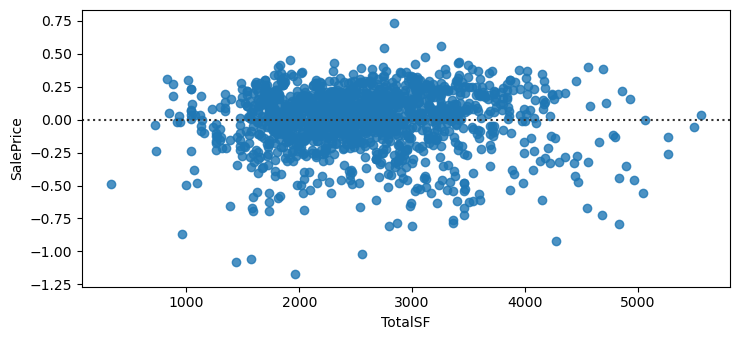

In [48]:
# plot the residuals
sns.residplot(x=x, y=y_log)

The residuals appear to be more randomly scattered across values of TotalSF. This is apparent by the funnel shape of the residuals in the model form. This appears to better meet the Homoscedasticity assumption and the Independence of Errors assumptions than the model with the untransformed Sales Price.

Check the correlation between the two new variables. If they are highly correlated we won't construct a mutliple linear regression model with the both of those variables as predictors.

In [49]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod']]
df_corr_mult_lreg.corr()

,TotalSF,YrSinceRemod
TotalSF,1.000000,-0.352279
YrSinceRemod,-0.352279,1.000000


TotalSF and YrSinceRemod are not highly correlated so we will construct a multiple linear regression model using the two variables as predictors of the log transformed Sales Price.

In [50]:
x = housing_training_data[['TotalSF','YrSinceRemod']]
y_log = np.log(housing_training_data['SalePrice'])

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_log, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2308.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:30:48   Log-Likelihood:                 326.20
No. Observations:                1455   AIC:                            -646.4
Df Residuals:                    1452   BIC:                            -630.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.2212      0.022    513.127   

An r-squared value of 0.725 means that the model explains 72.5 percent of the variance in the dependent variable. The adjusted R-squared value is about the same as the r-squared value, indicating that we aren't overfitting the model by addding multiple variables. The omnibus test, however, indicates that residuals are not normally distributed and the high kurtosis value indicates that the distribution of the residuals are more peaked than a normal distribution. The condition number is 1.12e+04, which is quite high and suggests that there may be multicollinearity in the model.

((array([-3.30417817, -3.04690148, -2.90382339, ...,  2.90382339,
          3.04690148,  3.30417817]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.27582754,
         13.32392695, 13.34550693])),
 (0.39450787103384416, 12.021290360600283, 0.9960111785807704))

Text(0.5, 1.0, 'Normal QQ Plot')

Text(0.5, 0, 'Theoretical Quantiles')

Text(0, 0.5, 'Sample Quantiles')

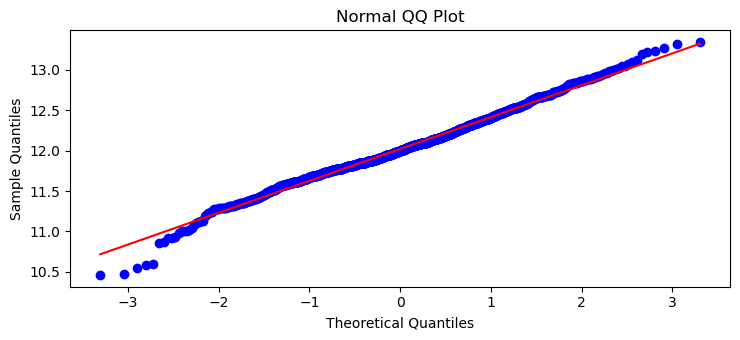

In [51]:
# qqplot
stats.probplot(y_log, dist="norm", plot=plt)
plt.title("Normal QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The distribution appears to follow the qqline more closely, indicating the distribution of the errors is approximately Normal.

We will try and add Garage Cars as a predictor in our model. First, lets observe the correlation between the existing predictors.

In [52]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod','GarageCars']]
df_corr_mult_lreg.corr()

,TotalSF,YrSinceRemod,GarageCars
TotalSF,1.000000,-0.352279,0.556693
YrSinceRemod,-0.352279,1.000000,-0.422033
GarageCars,0.556693,-0.422033,1.000000


The correlation between garage cars and total square feet is moderately high. We will take that into consideration when analyzing the output of the model.

In [53]:
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y_log = np.log(housing_training_data['SalePrice'])

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y_log, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1907.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:31:04   Log-Likelihood:                 448.25
No. Observations:                1455   AIC:                            -888.5
Df Residuals:                    1451   BIC:                            -867.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.1186      0.021    527.462   

## Inspection of multicollinearity: VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

        feature        VIF
0       TotalSF  10.929320
1    GarageCars   9.498463
2  YrSinceRemod   1.756965


## k fold Cross validation: 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [43]:
#define predictor and response variables
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y_log = np.log(housing_training_data['SalePrice'])

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y_log, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

0.14287133995162285

In [44]:
#define predictor and response variables
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y_log = np.log(housing_training_data['SalePrice'])

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y_log, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

0.19374277028581527

In [45]:
### Regress on principal components ###

LinearRegression()

Text(0.5, 0, 'Sale Price (Standard Scaled)')

Text(0, 0.5, 'Predicted Sale Price')

Text(0.5, 1.0, 'Sale Price vs Predicted Sale Price')

0.1091155711899885


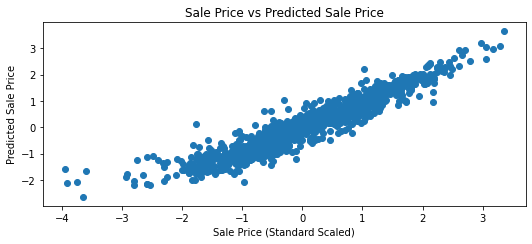

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
import os
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
pca = PCA(n_components=5)

## independent variables ###

x_raw = housing_training_data[numerical_vars]
x_scale = scale(x_raw)

x_pca_raw = pca.fit_transform(x_raw)
x_pca_scale = pca.fit_transform(x_scale) # PCA is affected by scale. We use the scaled values.

## log transform for dependent variable ##

housing_training_data[['standard_scaled_sale_price']] = scaler.fit_transform(np.log(housing_training_data[['SalePrice']]))

y_raw = np.array(housing_training_data[['SalePrice']]).reshape(-1,1)
y_scale = np.array(housing_training_data['standard_scaled_sale_price']).reshape(-1,1)

## train linear model ##

regr = LinearRegression()

regr.fit(x_pca_scale, y_scale)

y_pred = regr.predict(x_pca_scale)

plt.scatter(y_scale, y_pred)
plt.xlabel('Sale Price (Standard Scaled)')
plt.ylabel('Predicted Sale Price')
plt.title('Sale Price vs Predicted Sale Price')

## calculate RMSE ## 

# Mean Squared Error
MSE = np.square(np.subtract(y_scale,y_pred)).mean()
print(MSE)